<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/07_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 199MB/s]


In [4]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 178MB/s]


In [6]:
dt = pd.read_csv('Spam_finalData.csv')

In [7]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

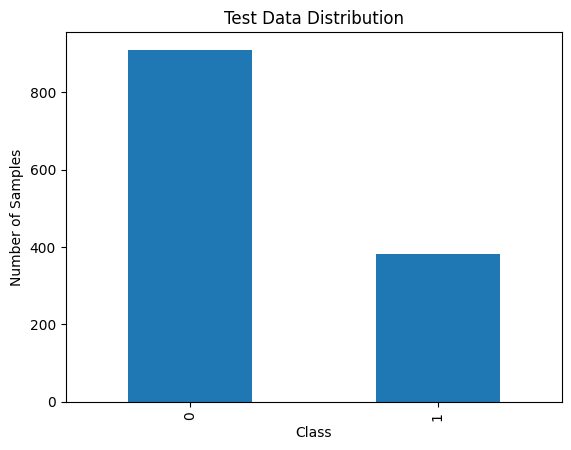

In [9]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [10]:
y_train.value_counts()

,count
label_num,
0,2762
1,1116


In [11]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.91415313225058


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[830,  80],
       [ 31, 352]])

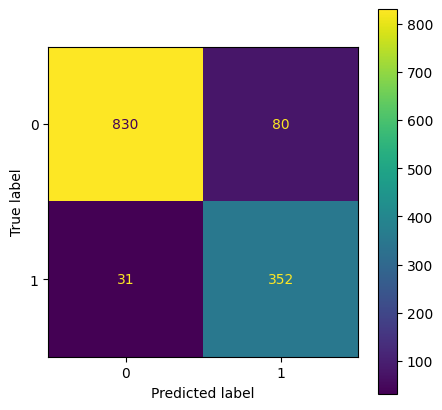

In [14]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [15]:
np.diag(conf_matrix).sum()/ conf_matrix.sum()

0.91415313225058

# Precision

In [16]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [17]:
precision_calc(conf_matrix)

0.8148148148148148

In [18]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8148148148148148

# Recall

In [19]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [20]:
recall_calc(conf_matrix)

0.9190600522193212

In [21]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9190600522193212

# F1 Score

In [22]:
pre = precision_calc(conf_matrix)
re = recall_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')


f1Score:0.8638031827892519


In [23]:
from sklearn.metrics import f1_score

In [24]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8638036809815951
